# Product Recommendation System

#### Recommendation engines basically are data filtering tools that make use of algorithms and data to recommend the most relevant items to a particular user.

In [1]:
import pandas as pd
import numpy as np

import datetime 
import time

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

#### Load CSV files into DataFrames

In [3]:
events_df = pd.read_csv('product_events.csv')
events_df.head(5)

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [4]:
events_df

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
190216,1433902645993,648369,view,340093,NaN
190217,1433899256648,1010167,view,62343,NaN
190218,1433900026204,24947,view,379288,NaN
190219,1433902463339,557538,view,367102,NaN


### Customer behaviour exploration

#### Total visitor

In [9]:
events_df.visitorid.size

190221

In [5]:

# Assign weights to events
event_weights = {
    'view': 1,
    'addtocart': 3,
    'transaction': 5
}

# Apply weights to the event types
events_df['event_weight'] = events_df['event'].map(event_weights)

print(events_df.head())

       timestamp  visitorid event  itemid  transactionid  event_weight
0  1433221332117     257597  view  355908            NaN             1
1  1433224214164     992329  view  248676            NaN             1
2  1433221999827     111016  view  318965            NaN             1
3  1433221955914     483717  view  253185            NaN             1
4  1433221337106     951259  view  367447            NaN             1


#### Unique visitor

In [10]:
all_customers = events_df.visitorid.unique()
all_customers.size

102563

#### Customers who bought something

In [11]:
customer_purchased = events_df[events_df.transactionid.notnull()].visitorid.unique()
customer_purchased.size

819

#### Customers who bought nothing

In [12]:
customer_browsed = [x for x in all_customers if x not in customer_purchased]
len(customer_browsed)

101744

#### Visitor id 102019 and their buying journey

In [13]:
events_df[events_df.visitorid == 102019].sort_values('timestamp')

,timestamp,visitorid,event,itemid,transactionid,event_weight
19690,1433175714335,102019,view,49521,NaN,1
19501,1433175801314,102019,addtocart,49521,NaN,3
14842,1433175812596,102019,view,150318,NaN,1
19573,1433175871497,102019,view,49521,NaN,1
8701,1433175894837,102019,view,49521,NaN,1
19708,1433175945872,102019,view,150318,NaN,1
8740,1433176042269,102019,view,49521,NaN,1
814,1433176736375,102019,transaction,150318,13556.0,5
19724,1433176736422,102019,transaction,49521,13556.0,5


#### Types of actions/events

In [14]:
events_df["event"].unique()

array(['view', 'addtocart', 'transaction'], dtype=object)

#### Total events

In [15]:
events_df["event"].size

190221

#### Count of view, addtocart, transaction

In [16]:
events_count=events_df["event"].value_counts()
events_count

event
view           184306
addtocart        4437
transaction      1478
Name: count, dtype: int64

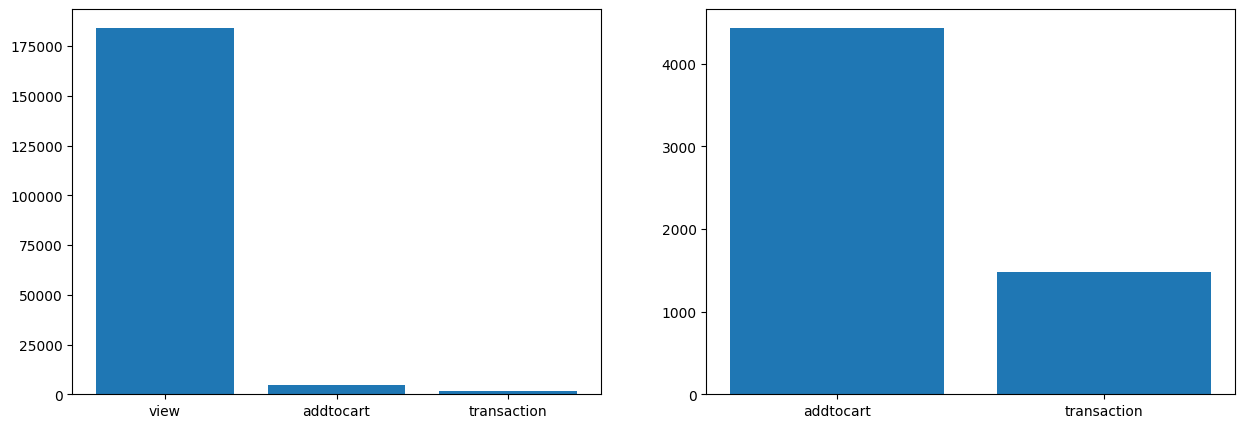

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.bar(events_count.index, events_count.values)
# sns.countplot(x= 'event', data=events_df)
# sns.barplot(x=events_count.index, y=events_count.values)

plt.subplot(1,2,2)
plt.bar(events_count.index[1:], events_count.values[1:])

plt.show()

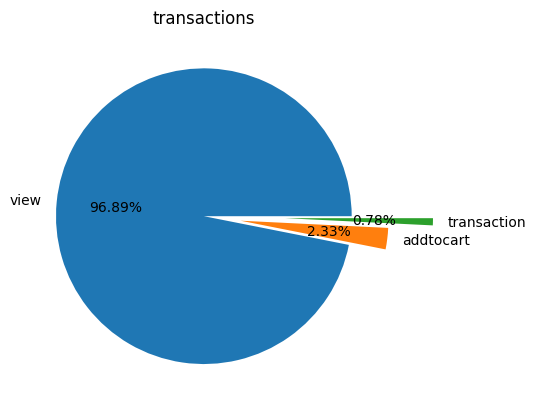

In [18]:
plt.title('transactions')
explode = (0, 0.25, 0.55)
plt.pie(events_count.values, explode=explode, labels=events_count.index,autopct='%1.2f%%')
plt.show()

#### Total transaction

In [19]:
events_df["transactionid"].dropna().shape[0]

1478

#### Unique Transaction

In [20]:
events_df["transactionid"].dropna().unique().shape[0]

1180

#### Total item

In [21]:
events_df["itemid"].size

190221

#### Unique item

In [22]:
events_df["itemid"].unique().size

60413

#### Grouping itemid by its event type and creating list of each of them

In [23]:
grouped = events_df.groupby('event')['itemid'].apply(np.array)
grouped

event
addtocart      [5206, 10572, 255275, 356475, 312728, 63312, 1...
transaction    [356475, 15335, 81345, 150318, 310791, 54058, ...
view           [355908, 248676, 318965, 253185, 367447, 22556...
Name: itemid, dtype: object

#### Most viewed Items

C:\Users\DELL\AppData\Local\Temp\ipykernel_4944\4144380944.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, order=x, palette="rocket")


<Axes: >

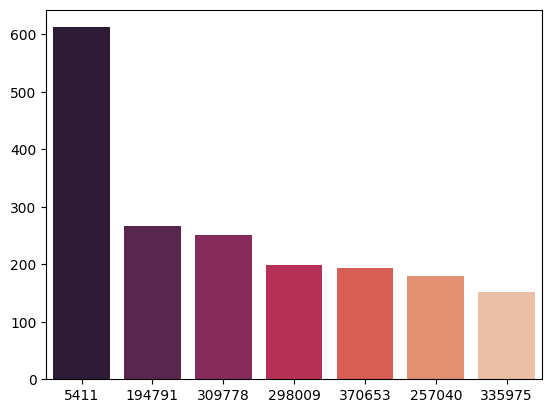

In [24]:
import operator
views = grouped['view']
# creating dictionary for key value pair 
count_view ={}
#since views is a list, we will convert it into numpy array for further manipulations
views = np.array(views[:])
#counting uniques values of views of this numpy views array
unique, counts = np.unique(views, return_counts=True)
# converting unique and counts as a dictionay with key as unique and value as counts
count_view = dict(zip(unique, counts))
#sorting the dictionary
sort_count_view = sorted(count_view.items(), key = operator.itemgetter(1), reverse = True)
# keeping number of unique views on X-axis
x = [i[0] for i in sort_count_view[:7]]
# keeping count number of views on Y-axis
y = [i[1] for i in sort_count_view[:7]]
sns.barplot(x=x, y=y, order=x, palette="rocket")

#### Most ADDTOCART items

C:\Users\DELL\AppData\Local\Temp\ipykernel_4944\2989718494.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, order=x, palette="pastel")


<Axes: >

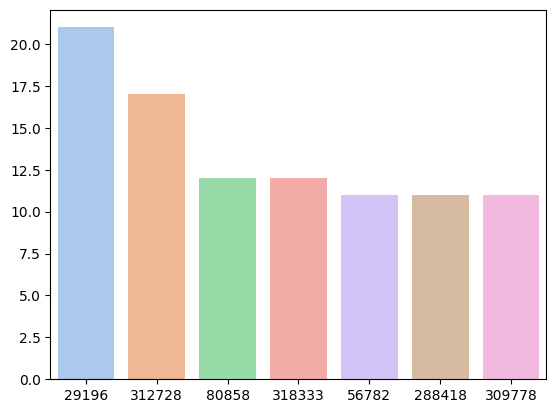

In [25]:
addtocart = grouped['addtocart']
# creating dictionary for key value pair 
count_addtocart ={}
#since addtocart is a list, we will convert it into numpy array for further manipulations
addtocart = np.array(addtocart[:])
#counting uniques values of addtocart items of this numpy addtocart array
unique, counts = np.unique(addtocart, return_counts=True)
# converting unique and counts as a dictionay with key as unique and value as counts
count_addtocart = dict(zip(unique, counts))
#sorting the dictionary
sort_count_addtocart = sorted(count_addtocart.items(), key = operator.itemgetter(1), reverse = True)
# keeping number of unique views on X-axis
x = [i[0] for i in sort_count_addtocart[:7]]
# keeping count number of views on Y-axis
y = [i[1] for i in sort_count_addtocart[:7]]
sns.barplot(x=x, y=y, order=x, palette="pastel")

#### Analyzing 29196 itemid

In [28]:
events_df.loc[(events_df.itemid==29196)]

,timestamp,visitorid,event,itemid,transactionid,event_weight
1061,1433182072067,680869,addtocart,29196,NaN,3
1829,1433201698338,463561,view,29196,NaN,1
4687,1433176349976,412614,view,29196,NaN,1
7398,1433189428186,820159,view,29196,NaN,1
7485,1433206359262,1016655,addtocart,29196,NaN,3
...,...,...,...,...,...,...
178169,1433874314414,106943,view,29196,NaN,1
182316,1433901135485,384770,view,29196,NaN,1
182682,1433877802625,588087,view,29196,NaN,1
187022,1433866219500,1295525,view,29196,NaN,1


#### Most TRANSACION items

C:\Users\DELL\AppData\Local\Temp\ipykernel_4944\1410217524.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, order=x, palette="vlag")


<Axes: >

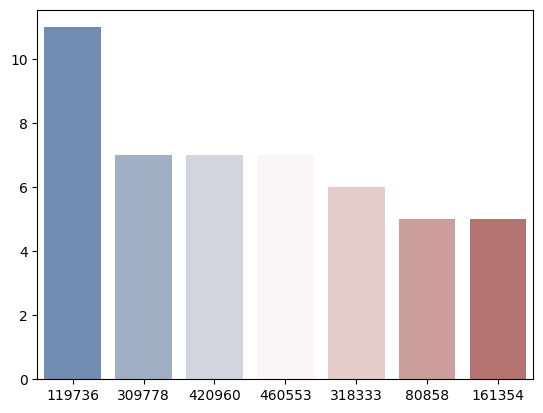

In [26]:
transaction = grouped['transaction']
# creating dictionary for key value pair 
count_transaction ={}
#since addtocart is a list, we will convert it into numpy array for further manipulations
transaction = np.array(transaction[:])
#counting uniques values of addtocart items of this numpy addtocart array
unique, counts = np.unique(transaction, return_counts=True)
# converting unique and counts as a dictionay with key as unique and value as counts
count_transaction = dict(zip(unique, counts))
#sorting the dictionary
sort_count_transaction = sorted(count_transaction.items(), key = operator.itemgetter(1), reverse = True)
# keeping number of unique views on X-axis
x = [i[0] for i in sort_count_transaction[:7]]
# keeping count number of views on Y-axis
y = [i[1] for i in sort_count_transaction[:7]]
sns.barplot(x=x, y=y, order=x, palette="vlag")

##### Analyzing 119736 itemid

In [29]:
events_df.loc[(events_df.itemid==119736)]

,timestamp,visitorid,event,itemid,transactionid,event_weight
5555,1433177781018,286616,view,119736,NaN,1
9933,1433220222122,163253,view,119736,NaN,1
11812,1433185467024,1161163,transaction,119736,118.0,5
13824,1433181192471,286616,view,119736,NaN,1
17762,1433178692996,350566,view,119736,NaN,1
...,...,...,...,...,...,...
179605,1433875555927,794450,view,119736,NaN,1
180221,1433882087915,748040,view,119736,NaN,1
184424,1433884719493,841939,view,119736,NaN,1
185379,1433874314289,429443,view,119736,NaN,1


### Now lets offer visitor a list of items of what previous visitors bought TOGETHER with the item they are currently viewing. This way we can guide them in their buying journey

In [30]:
# first - lets create a list of visitors who made a purchase
customer_purchased = events_df[events_df.transactionid.notnull()].visitorid.unique()

#lets create a list of purchased items
purchased_items = []

for customer in customer_purchased:
    purchased_items.append(list(events_df.loc[(events_df.visitorid == customer) & (events_df.transactionid.notnull())].itemid.values))

In [35]:
purchased_items[:7]

[[356475],
 [15335,
  380775,
  237753,
  317178,
  12836,
  400969,
  105792,
  25353,
  200793,
  80582,
  302422],
 [81345],
 [150318, 49521],
 [310791, 299044],
 [54058,
  284871,
  251130,
  268335,
  183049,
  261940,
  369093,
  370745,
  192990,
  277119,
  241716,
  283766,
  16417],
 [150100, 50934, 36013, 26210, 118199, 234199, 416187, 167985, 146735, 4887]]

### lets define the function that would show items that were bought together by the same customer

In [36]:
def recommend_items(item_id, purchased_items):
    recommendation_list =[]
    for x in purchased_items:
        if item_id in x:
            recommendation_list +=x
    
    # remove the pass item from the list and merge the above created list
    recommendation_list = list(set(recommendation_list) - set([item_id]))
    return recommendation_list

### Lets recommend items from a customer who previously bought ,when a visitor is viewing item_id = 200793

In [37]:
recommend_items(200793, purchased_items)

[105792, 12836, 80582, 380775, 15335, 400969, 25353, 302422, 237753, 317178]